# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [2]:
head(weatherPraga[order(weatherPraga$PRCP,decreasing = T),c("DATE","PRCP")],10)

DATE PRCP 
165 1939 745.5
54  1828 665.4
228 2002 661.5
172 1946 638.3
116 1890 637.3
63  1837 634.9
184 1958 633.1
57  1831 625.7
192 1966 624.1
55  1829 622.4

* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

[1] "La temperatura mínima ha subido  0.0173750305134395 ºC/año"


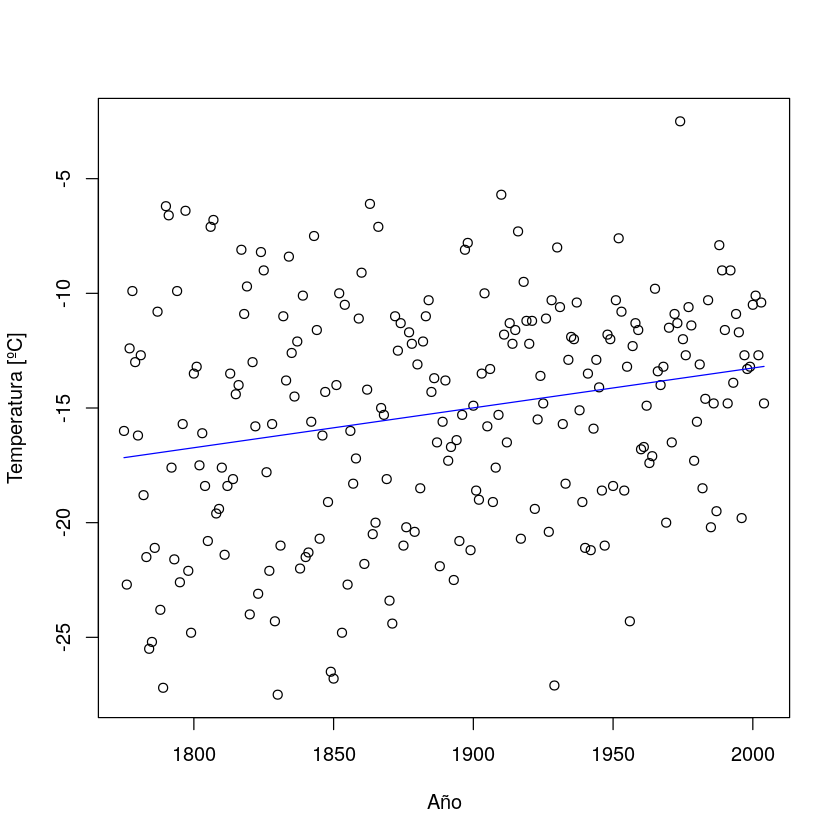

In [3]:
plot(weatherPraga$DATE,weatherPraga$EMNT,xlab = "Año",ylab = "Temperatura [ºC]")

model<-lm(data = weatherPraga, EMNT~DATE)
lines(weatherPraga$DATE,predict(model,weatherPraga),col="blue")

print(paste("La temperatura mínima ha subido ",model$coefficients[2],"ºC/año"))

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [4]:
tmin1<-weatherPraga[weatherPraga$DATE %in% seq(1775,1794),"EMNT"]
tmin2<-weatherPraga[weatherPraga$DATE %in% seq(1985,2004),"EMNT"]

print(paste("La temperatura mínima media en el intervalo [1775,1794] es:",mean(tmin1),"ºC"))
print(paste("La temperatura mínima media en el intervalo [1985,2004] es:",mean(tmin2),"ºC"))
print(paste("La diferencia entre ambos es:",mean(tmin1)-mean(tmin2),"ºC"))


sp1<-shapiro.test(tmin1)
sp2<-shapiro.test(tmin2)

print(paste("Aplicamos shapiro test en las temperaturas. El pvalor en un las dos secuencias es",
            sp1$p.value,"y",sp2$p.value,". Ambos son valores muy altos, así que asumimos normalidad."))
print("Como las dos secuencias de datos son gausianas podemos aplicar un test de Welch(Podemos asumir que la varianza no será igual o podemos comprobarlo con Bartlett)")

tt<-t.test(tmin1,tmin2)

print(paste("Su p-valor es de",tt$p.value,"<0.05."))
print("Así que podemos descartar la hipótesis nula y decir que la diferencia es estadísticamente significativa.")



[1] "La temperatura mínima media en el intervalo [1775,1794] es: -16.935 ºC"
[1] "La temperatura mínima media en el intervalo [1985,2004] es: -13.04 ºC"
[1] "La diferencia entre ambos es: -3.895 ºC"
[1] "Aplicamos shapiro test en las temperaturas. El pvalor en un las dos secuencias es 0.380826132704572 y 0.0751036246207044 . Ambos son valores muy altos, así que asumimos normalidad."
[1] "Como las dos secuencias de datos son gausianas podemos aplicar un test de Welch(Podemos asumir que la varianza no será igual o podemos comprobarlo con Bartlett)"
[1] "Su p-valor es de 0.0257068429001728 <0.05."
[1] "Así que podemos descartar la hipótesis nula y decir que la diferencia es estadísticamente significativa."


## Datos banco mundial

Carga los datos del banco mundial

In [2]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [6]:
#Dos formas de hacerlo, con merge:

databank1970<-databank[databank$Indicator.Code == "EN.ATM.GHGT.KT.CE",
                     c("1970","Country.Name","Country.Code")]
co2eq1970<-merge(databank1970,realCountryData, by="Country.Code")

print(paste("El país que más toneladas equivalentes de CO2 emitió en 1970 fue:",
            co2eq1970[which.max(co2eq1970$"1970"),"Country.Name"]))

print(paste("Emitió: ",max(co2eq1970$"1970",na.rm=T),"kt de CO2"))

# Con %in%

co2eq1970<-subset(databank,
                  Indicator.Code=="EN.ATM.GHGT.KT.CE" & Country.Code 
                  %in% realCountryData$Country.Code)[,c("Country.Name","1970")]

print(paste("El país que más toneladas equivalentes de CO2 emitió en 1970 fue:",
            co2eq1970[which.max(co2eq1970$"1970"),"Country.Name"]))

print(paste("Emitió: ",max(co2eq1970$"1970",na.rm=T),"kt de CO2"))

[1] "El país que más toneladas equivalentes de CO2 emitió en 1970 fue: United States"
[1] "Emitió:  5400503.5 kt de CO2"
[1] "El país que más toneladas equivalentes de CO2 emitió en 1970 fue: United States"
[1] "Emitió:  5400503.5 kt de CO2"


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [7]:
co2eq2012<-subset(databank,Indicator.Code=="EN.ATM.GHGT.KT.CE" & 
                  databank$Country.Code %in% realCountryData$Country.Code)[,c("Country.Name","2012")]

# Otra forma de hacerlo:                     
#co2eq2012<-merge(subset(databank,Indicator.Code == "EN.ATM.GHGT.KT.CE"),realCountryData, by="Country.Code")[,c("Country.Name","2012")]

co2eq2012<-na.omit(co2eq2012)

head(co2eq2012[order(co2eq2012$"2012",decreasing = T),],5)

Country.Name       2012    
3079  China              12454711
19959 United States       6343841
8599  India               3002895
2199  Brazil              2989418
16039 Russian Federation  2803398

¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [20]:
myGeometricMean<-function(X,na.rm=F){
    if (na.rm){
        X<-na.omit(X)
    }
    m<-1
    for (xi in X){
        m<-m*xi        
    }
    m^(1/length(X))
}
library(reshape2)
co2eqChina<-subset(databank,Indicator.Code=="EN.ATM.GHGT.KT.CE" & databank$Country.Code=="CHN")

co2eqChina<-co2eqChina[,45:57]
co2eqChina

ratio<-co2eqChina[2:length(co2eqChina)]/co2eqChina[1:length(co2eqChina)-1]

mn<-myGeometricMean(ratio,na.rm=T)
realIncreeaseMean<-(mn-1)*100
print(paste0("La media de todos los incrementos anuales es del:", round(realIncreeaseMean,2),"%"))

paste("")
paste0("Comprobamos que es cierto. El valor de CO2 en 2000 era:",co2eqChina["2000"],
            ". El valor en 2012 era:",co2eqChina["2012"])
paste0("El ratio entre los dos es:",co2eqChina["2012"]/co2eqChina["2000"])
paste0("Coincide con el ratio calculado con la media:",mn^12,4)


2000    2001    2002    2003    2004    2005    2006    2007    2008    
3079 5082326 5145522 5474915 6226962 7116642 7803536 8573395 9124046 10022025
     2009     2010     2011     2012    
3079 10617265 11183811 12064260 12454711

[1] "La media de todos los incrementos anuales es del:7.76%"


[1] ""

[1] "Comprobamos que es cierto. El valor de CO2 en 2000 era:5082325.6. El valor en 2012 era:12454710.6051"

[1] "El ratio entre los dos es:2.45059281622964"

[1] "Coincide con el ratio calculado con la media:2.450592816229644"

Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2017 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

No id variables; using all as measure variables


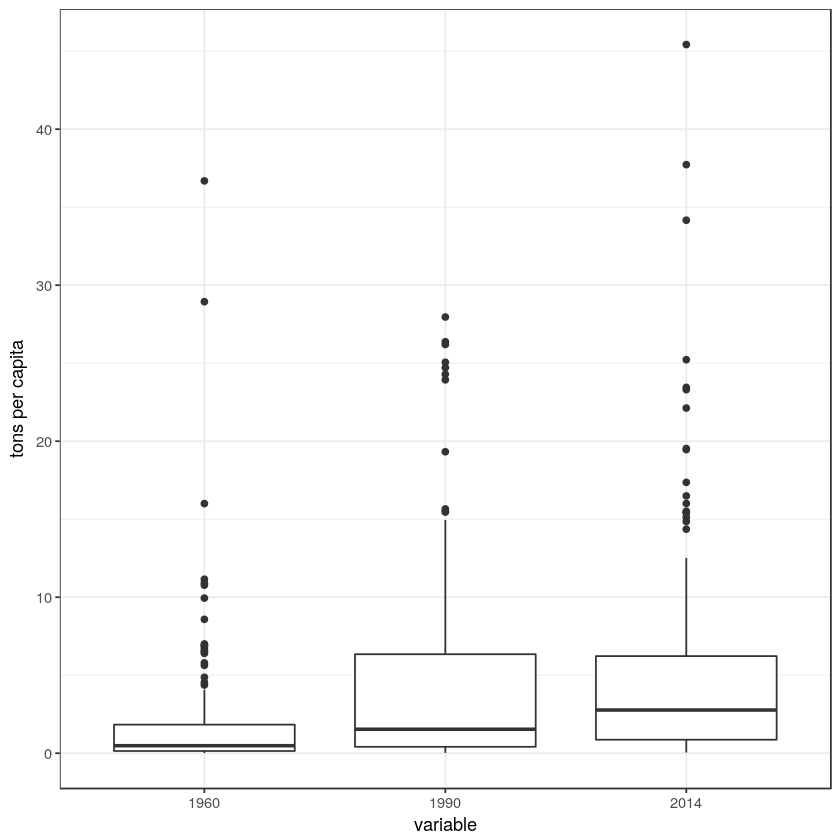

In [9]:
library(reshape2)
library(ggplot2)

coe2kt<-subset(databank,Indicator.Code=="EN.ATM.CO2E.PC" & 
               databank$Country.Code %in% realCountryData$Country.Code)

tmpdf<-melt(coe2kt[,c("1960","1990","2014")])
ggplot(tmpdf,aes(y=value,x=variable))+geom_boxplot(na.rm=T)+theme_bw()+ylab("tons per capita")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


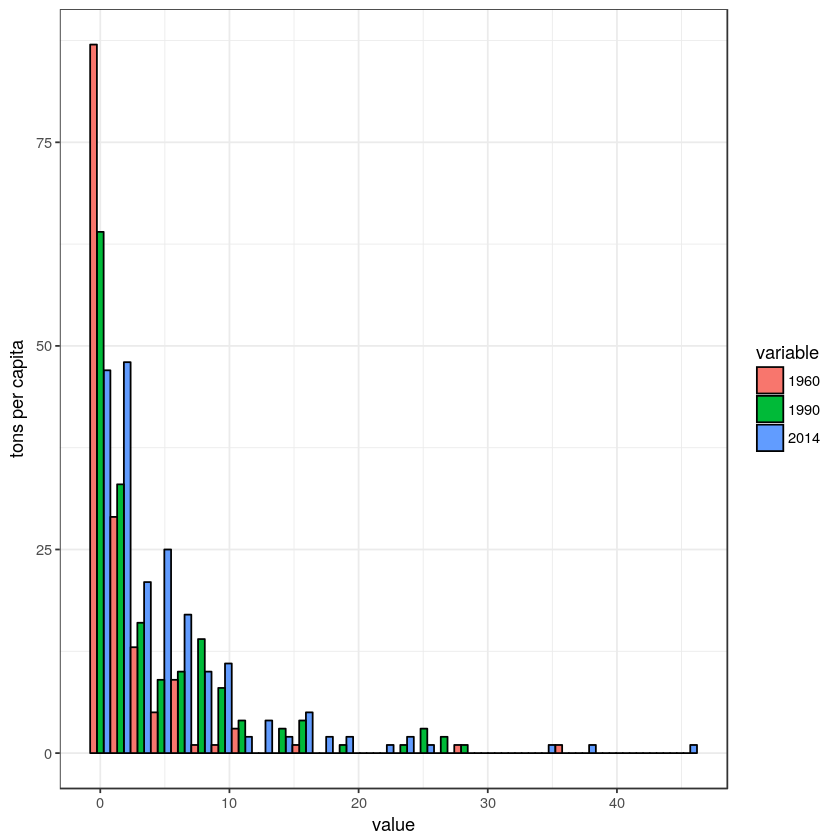

In [10]:
ggplot(tmpdf,aes(x=value,fill=variable))+geom_histogram(na.rm=T,position = "dodge",color="black")+
    theme_bw()+ylab("tons per capita")

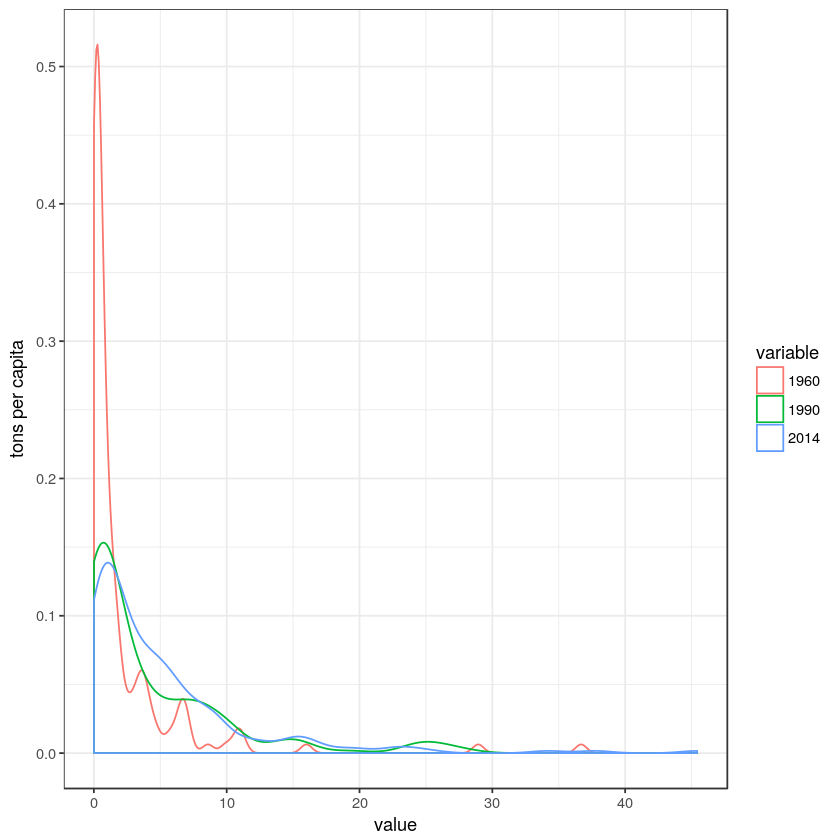

In [11]:
ggplot(tmpdf,aes(x=value,color=variable))+geom_density(na.rm=T)+
    theme_bw()+ylab("tons per capita")

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

Using Country.Code as id variables


Country Year value    
1 EUU     1960 2359594.9
2 NAC     1960 3083749.0
3 SSA     1960  126081.5
4 TEA     1960  840235.7
5 WLD     1960 9396705.8
6 EUU     1961 2445945.7

Warning message:
“Removed 15 rows containing missing values (geom_path).”

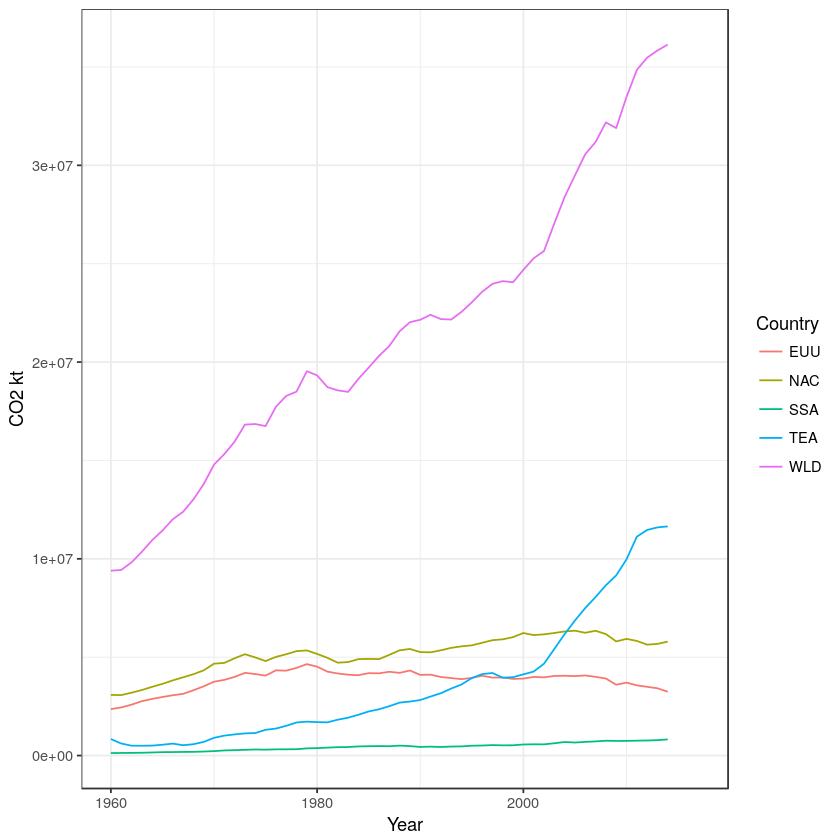

In [23]:
library(reshape2)
library(ggplot2)
country_codes<-c("WLD","EUU","SSA","NAC","TEA")

# Emisiones de CO2 (kt)
coe2kt<-subset(databank,Indicator.Code=="EN.ATM.CO2E.KT" & databank$Country.Code %in% country_codes) 
yearCols<-5:(ncol(databank)-1)
coe2kt<-coe2kt[,c(2,yearCols)]
coe2kt<-melt(coe2kt)

coe2kt[,"variable"]<-as.numeric(as.character(coe2kt[,"variable"]))
names(coe2kt)<-c("Country","Year","value")
head(coe2kt)

ggplot(data=coe2kt,aes(x=Year,y=value,color=Country))+geom_line()+theme_bw()+ylab("CO2 kt")


Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

Este ejemplo yo lo había pensado hacer con *EN.ATM.CO2E.KT* aunque algunos habeis usado *EN.ATM.GHGT.KT.CE*. Los resultado no son iguales pero me he fijado en como lo habeis desarrollado. No he tenido encuenta para la evaluación si se elegía una columna u otra.

[1] "El valor predicho por el modelo lineal es:"


1 
36077323

[1] "El valor predicho por el polinomio de grado 3 es:"


1 
45926324

[1] "El valor predicho por eel polinomio de grado 10 es:"


1 
87325918

Warning message:
“Removed 3 rows containing missing values (geom_path).”

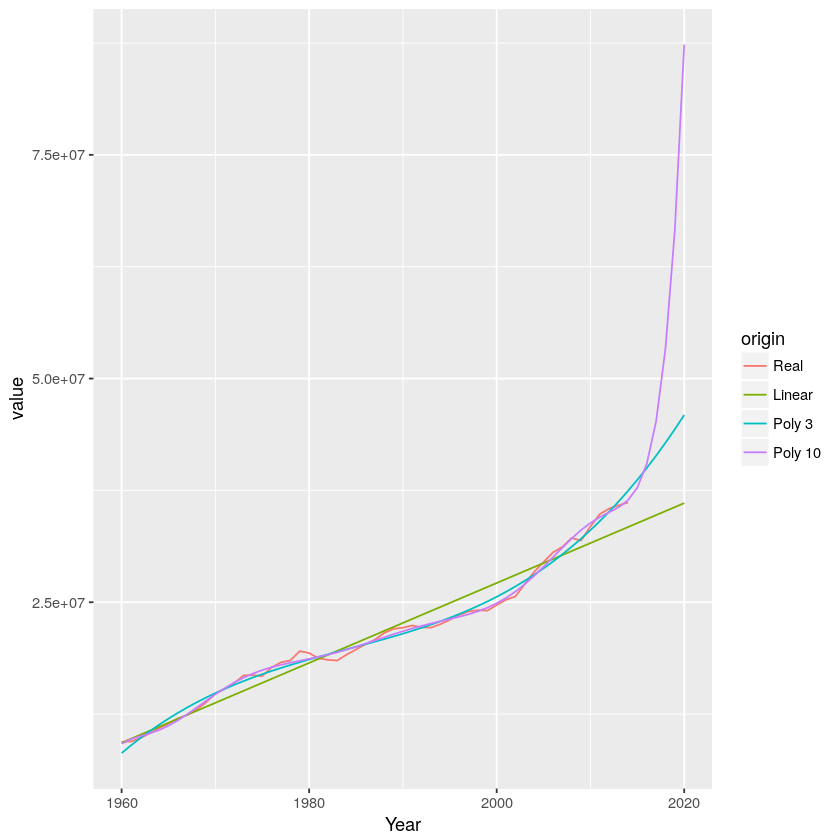

In [13]:
coe2ktwld<-subset(coe2kt,Country=="WLD")
model1<-lm(data=coe2ktwld,formula=value~Year)
print("El valor predicho por el modelo lineal es:")
predict(model1,data.frame(Year=2020))

model3<-lm(data=coe2ktwld,formula=value~poly(Year,3))
print("El valor predicho por el polinomio de grado 3 es:")
predict(model3,data.frame(Year=2020))

model10<-lm(data=coe2ktwld,formula=value~poly(Year,10))
print("El valor predicho por eel polinomio de grado 10 es:")
predict(model10,data.frame(Year=2020))

coe2ktwldpred<-data.frame(origin="Real",Year=coe2ktwld$Year,value=coe2ktwld$value)

years<-1960:2020
coe2ktwldpred<-rbind(coe2ktwldpred,data.frame(origin="Linear",Year=years,value=predict(model1,data.frame(Year=years))))
coe2ktwldpred<-rbind(coe2ktwldpred,data.frame(origin="Poly 3",Year=years,value=predict(model3,data.frame(Year=years))))
coe2ktwldpred<-rbind(coe2ktwldpred,data.frame(origin="Poly 10",Year=years,value=predict(model10,data.frame(Year=years))))

ggplot(data=coe2ktwldpred,aes(x=Year,y=value,color=origin))+geom_line()


## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [14]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

No id variables; using all as measure variables


[1] "La correlación entre le CO2 emitido y el existente en la atmósfera es de:"

[1] 0.9845578

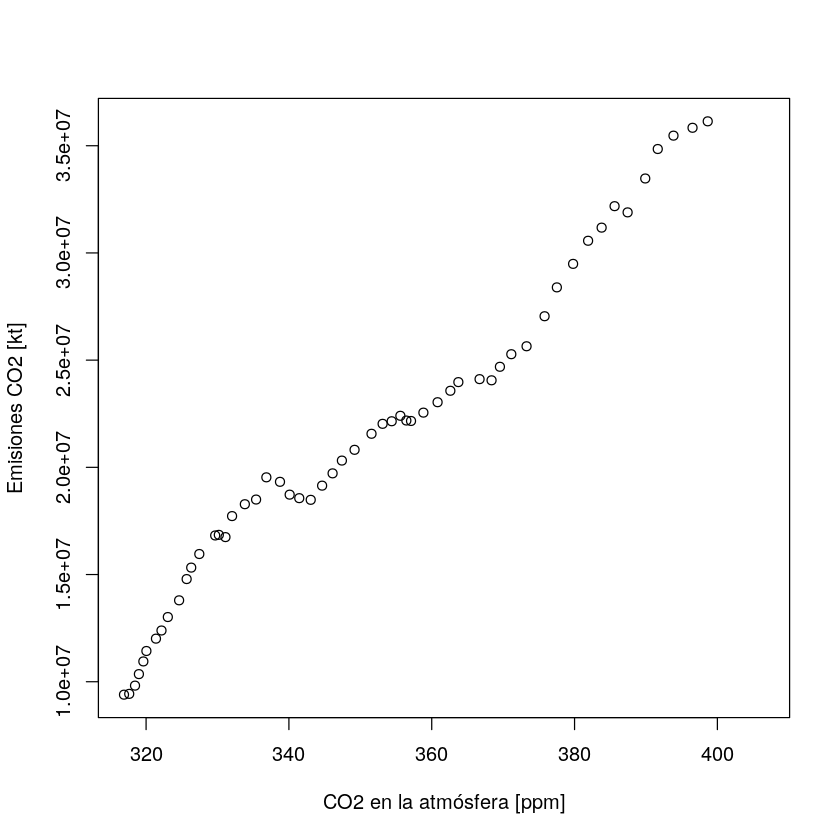

In [15]:
# Agregamos y calculamos el nivel de CO2 medio anual
yearlyco2ppm<-aggregate(interpolated ~ year, data = co2ppm, mean)
names(yearlyco2ppm)<-c("year","co2.atm")

# Preparamos los datos de databank
coe2ktwld<-subset(databank,Indicator.Code=="EN.ATM.CO2E.KT" & databank$Country.Code=="WLD") 
yearCols<-5:(ncol(databank)-1)
coe2ktwld<-coe2ktwld[,c(yearCols)]
coe2ktwld<-melt(coe2ktwld)
names(coe2ktwld)<-c("year","co2.emission")

#Unimos todo en un único dataframe
co2tot<-merge(yearlyco2ppm,coe2ktwld,by="year")

plot(co2tot$co2.atm,co2tot$co2.emission,xlab = "CO2 en la atmósfera [ppm]",ylab="Emisiones CO2 [kt]")

paste("La correlación entre le CO2 emitido y el existente en la atmósfera es de:")
cor(co2tot$co2.atm,co2tot$co2.emission,use="complete.obs")

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [16]:
m<-merge(co2tot,weatherPraga[,c("DATE","EMNT")],by.x="year",by.y="DATE")[,c("co2.atm","co2.emission","EMNT")]
colnames(m)<-c("CO2 atmósfera","emisiones CO2","Temperatura mínima Praga")
cor(m)

CO2 atmósfera emisiones CO2 Temperatura mínima Praga
CO2 atmósfera            1.0000000     0.9703198     0.1783153               
emisiones CO2            0.9703198     1.0000000     0.2254552               
Temperatura mínima Praga 0.1783153     0.2254552     1.0000000